In [1]:
# # to clone the github project 
!git clone https://github.com/nesl/RadHAR.git
# # to mount the google drive 
from google.colab import drive
drive.mount('/content/drive')
# !pip install open3d
# !pip install pptk
# !pip install laspy
# !pip install pillow



Cloning into 'RadHAR'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 263 (delta 1), reused 5 (delta 1), pack-reused 247
Receiving objects: 100% (263/263), 91.98 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (208/208), done.
Checking out files: 100% (208/208), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['boxing']
/content/RadHAR/Data/Test/boxing/__20_boxing_6.txt
boxing


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:372: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:373: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:374: DeprecationWarning: `np.float` is a deprecated alias f

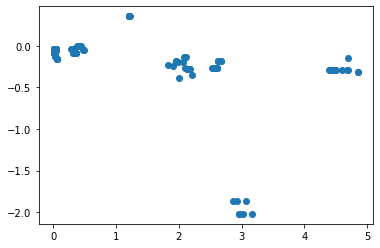

xy plane after frame divider 


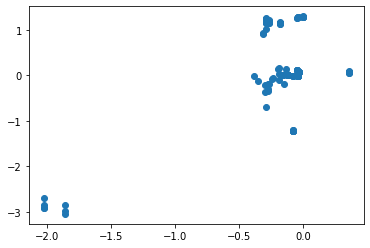

yz plane after frame divider 


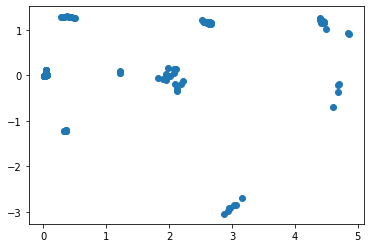

xz plane after frame divider 


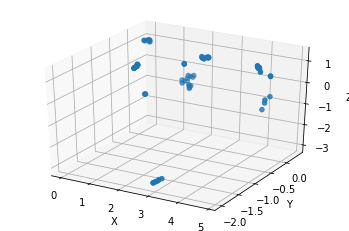

after frame divider  117


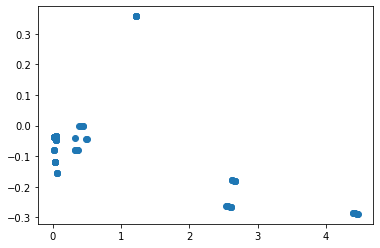

xy plane after dbscan


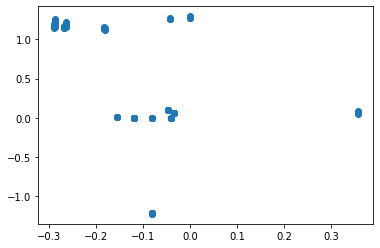

yz plane after dbscan


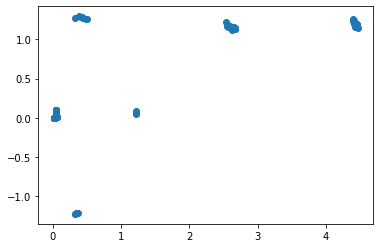

xz plane after dbscan


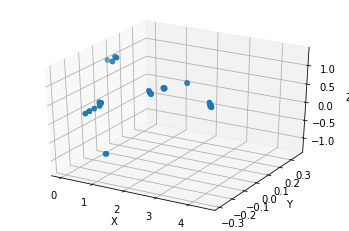

after dbscan 86


NameError: ignored

In [3]:
"""
Extract the VOXEL representation from the point cloud dataset

USAGE: change the parent_dir and extract_path to the correct variables.

- parent_dir is raw Path_to_training_or_test_data.
- extract_path is the Path_to_put_extracted_data samples.

EXAMPLE: SPECIFICATION

parent_dir = '/Users/sandeep/Research/Ti-mmWave/data/Temp_Samples/Train/'
sub_dirs=['boxing','jack','jump','squats','walk']
extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
"""

parent_dir = '/content/RadHAR/Data/Test'
sub_dirs=['boxing','jack','jump','squats','walk']
extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS. S2039761. Mian Tashfeen Shahid Anwar. /Signal Data Pre Processing./Signal Processing Implementation/moredata'

import glob
import os
import numpy as np
import csv
import time
import time
import random
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



"""   SIGNAL PROCESSING METHIODS WHICH HAVE BEEN IMPLEMENTED BY ME SO FAR.

      1: dbsccanbyme(frame of form [ x,y,z , intensity , velocity] # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543] , radius of the neighbourhood of the point , minimum points in the radius of the neighbourhood)
      
      2: myvoxel([x , y , z , 0.0 , velociaty])
      
      3: myrotation(frame of form [ x,y,z , intensity , velocity] , array of angles)
      
      4: framedivider(data_pro1 array , noofframes you want to divide the points into)
"""

def visx(twodframe , which):
    xaxis = []
    yaxis = []
    for y in twodframe:
       xaxis.append(y[0])
       yaxis.append(y[1])
    plt.scatter(xaxis, yaxis)
    plt.show()
    print(which)
  
def projection(data_pro1):#This function is made for the projection of frames to 2d frames namely xy frame yz frame and xz frame   
    pointsxy = []
    pointsyz = []
    pointsxz = []
    for y in data_pro1:    
        pointsxy.append([y[0] , y[1] , y[3] , y[4]])
        pointsyz.append([y[1] , y[2] , y[3] , y[4]])
        pointsxz.append([y[0] , y[2] , y[3] , y[4]])
    return pointsxy , pointsyz , pointsxz

def framedivider(data_pro1 , noofframes):#function for frame divider. it takes in frame and the number of frames you want to divide those frames in.
    totalpoints =[]
    totalll = 0
    data_pro1_new = [] 
    for i in data_pro1:
        feedarray = []
        f = data_pro1[i]
        for y in f:
           totalpoints.append(y)
    for i in range(0 , noofframes):
        frame_i = []
        for i in range(int(len(totalpoints) /noofframes)):
          frame_i.append(totalpoints[i])
          totalpoints.pop(i)
        data_pro1_new.append(frame_i)
    return data_pro1_new

def visualize(finalframepoints): # This function is made for the visualization of the 3D point clouds. It takes in the 3D points in a frame 
          xaxis = []
          yaxis = []
          zaxis = []
          for i in finalframepoints:
                xaxis.append(i[0])
                yaxis.append(i[1])
                zaxis.append(i[2])
          xs = xaxis
          ys = yaxis
          zs = zaxis
          fig = plt.figure()
          ax = fig.add_subplot(111, projection='3d')
          ax.scatter(xs,ys,zs)
          ax.set_xlabel("X")
          ax.set_ylabel("Y")
          ax.set_zlabel("Z")
          plt.show()

def dbscanbyme(frame , radiusOfNeighnbourhood , minpts): # function for DBSCAN it takes in the 3d frame and the radius of the neighbourhood and the minimum num ber of points  which shoukld be in the radius of the centeroids.
    # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543]
    centeroids = []
    pointsinframe = []
    for i in frame:
      xc = i[0]
      yc = i[1]
      zc = i[2]   
      velocity = i[3]
      intensity = i[4]
      pointsinframe.append([xc,yc,zc,velocity,intensity]) 
    noofpoints = len(pointsinframe)
    allpointswhoseneighbours = []
    for point0 in pointsinframe:
      neighbour = []
      pointwhoseneighbour = [point0]   
      for point1 in pointsinframe:
        dist = (((point1[0]) - (point0[0])) * ((point1[0]) - (point0[0]))) + (((point1[1]) - (point0[1])) * ((point1[1]) - (point0[1]))) + 0.25 * (((point1[2]) - (point0[2])) * ((point1[2]) - (point0[2])))
        isneighbour = False
        if (dist < radiusOfNeighnbourhood):
          isneighbour = True
          if isneighbour == True:
            neighbour.append(point1)
      pointwhoseneighbour.append(neighbour)
      allpointswhoseneighbours.append(pointwhoseneighbour)
    h = allpointswhoseneighbours
    for x in h:
      if (len(x[1]) >= minpts):
        centeroids.append(x)
    return allpointswhoseneighbours , centeroids

def myvoxel(x,y,z,a,velocity): 
    points = []
    pointsfinal = []
    jtrack = []
    for i in range(len(x)):
       points.append([x[i] , y[i] , z[i] , a[i] , velocity[i]])
    pointsfinal = points
    for i in points:
      if i[0] >= 2 or i[0] <= 3 or i[1] >= 0.0 or i[1] <= 0.1 or i[2] >= 0.1 or i[2] <= 0.2: # parameters for enhanced voxelization 
        for j in pointsfinal:
          if j[0] == i[0] and j[1] == i[1] and j[2] == i[2]:               
            jtrack.append(j)
            pointsfinal.remove(j)
    return pointsfinal , jtrack

def myvoxel2vis(frame):
    xpoint = []
    ypoint = []
    zpoint = []
    velocity = []
    intensity = []
    for i in frame:
      xpoint.append(i[0])
      ypoint.append(i[1])
      zpoint.append(i[2])
      velocity.append(i[3])
      intensity.append(i[4])
    maxx = max(xpoint)
    minx = min(xpoint)
    maxy = max(ypoint)
    miny = min(ypoint)
    maxz = max(zpoint)
    minz = min(zpoint)
    print("l x " , len(xpoint))
    print("l y " , len(ypoint))
    print("l z " , len(zpoint))
    print("maxx " , maxx)
    print("minx " , minx)
    print("maxy " , maxy)
    print("miny " , miny)
    print("maxz " , maxz)
    print("minz " , minz)
    rangex = maxx - minx
    rangey = maxy - miny
    rangez = maxz - minz
    print("range x " , rangex)
    print("range y " , rangey)
    print("range z " , rangez)

def myvoxel2(frame):
    actrangexmin = 2
    actrangexmax = -2
    actrangeymin = 3 
    actrangeymax = -3
    actrangezmin = 3 
    actrangezmax = -3 


    rangexpoint = range(int(0),int(5.0))
    rangeypoint = range(int(-2.0),int(2.0))
    rangezpoint = range(int(-3),int(1))

    xpoint = []
    ypoint = []
    zpoint = []
    intensity = []
    velocity = []

    for i in frame:
      xpoint.append(i[0])
      ypoint.append(i[1])
      zpoint.append(i[2])
      velocity.append(i[3])
      intensity.append(i[4])

    finalframepoints = [xpoint , ypoint , zpoint , velocity , intensity]

    maxx = max(xpoint)
    minx = min(xpoint)
    maxy = max(ypoint)
    miny = min(ypoint)
    maxz = max(zpoint)
    minz = min(zpoint)

    rangex = range(int(minx),int(maxx))
    rangey = range(int(miny),int(maxy))
    rangez = range(int(minz),int(maxz))

    if rangex > actrangex:
      for y in finalframepoints:
        if y in finalframepoints:
          if y[0] in rangexpoint:
            print("y")
          else: finalframepoints.remove(y)
    if rangey > actrangey:
      for y in finalframepoints:
        if y in finalframepoints:
          if y[1] in rangeypoint:
            print("y")
          else: finalframepoints.remove(y)
    if rangez > actrangez:
      for y in finalframepoints:
        if y in finalframepoints:
          if y[2] in rangezpoint:
            print("y")
          else: finalframepoints.remove(y)
    return finalframepoints

def myrotation(frame , angle): # Function for rotation 
  # frame form [0.01171875, -0.0390625, -0.0078125, 0.0, 30.7298469543]
  sphericalcoordinates = []
  cartesianframes = []
  finalframe = []
  for i in range(len(frame)):
   
    r = math.sqrt((frame[i][0]*frame[i][0]) + (frame[i][1] * frame[i][1]) + (frame[i][2] * frame[i][2]))
    theta = math.acos(frame[i][2] / r)

    theta1 = abs(math.atan(frame[i][1] / frame[i][0]))
  
    sphericalcoordinates.append([r , theta , theta1])
    xcoordinate = r * math.sin(theta) * math.cos(theta1 + (angle * theta1)) + ((angle) * frame[i][0])
    ycoordinate = r * math.sin(theta) * math.sin(theta1 + (angle * theta1)) + ((angle) * frame[i][1])
    zcoordinate = r * math.cos(theta)
    cartesianframes.append([ xcoordinate , ycoordinate , zcoordinate  , 0.0 ,  frame[i][4]])
  return sphericalcoordinates , cartesianframes 


def voxalize(x_points, y_points, z_points, x, y, z, velocity): # orignal voxelization function 

    x_min = np.min(x)
    x_max = np.max(x)

    y_min = np.min(y)
    y_max = np.max(y)

    z_max = np.max(z)
    z_min = np.min(z)

    z_res = (z_max - z_min)/z_points
    y_res = (y_max - y_min)/y_points
    x_res = (x_max - x_min)/x_points


    pixel = np.zeros([x_points,y_points,z_points])

    x_current = x_min
    y_current = y_min
    z_current = z_min

    x_prev = x_min
    y_prev = y_min
    z_prev = z_min

    x_count = 0
    y_count = 0
    z_count = 0
    start_time = time.time()


    for i in range(y.shape[0]):
        x_current = x_min
        x_prev = x_min
        x_count = 0
        done=False

        while x_current <= x_max and x_count < x_points and done==False:
            y_prev = y_min
            y_current = y_min
            y_count = 0
            while y_current <= y_max and y_count < y_points and done==False:
                z_prev = z_min
                z_current = z_min
                z_count = 0
                while z_current <= z_max and z_count < z_points and done==False:
                    if x[i] < x_current and y[i] < y_current and z[i] < z_current and x[i] >= x_prev and y[i] >= y_prev and z[i] >= z_prev:
                        pixel[x_count,y_count,z_count] = pixel[x_count,y_count,z_count] + 1
                        done = True

                        #velocity_voxel[x_count,y_count,z_count] = velocity_voxel[x_count,y_count,z_count] + velocity[i]
                    z_prev = z_current
                    z_current = z_current + z_res
                    z_count = z_count + 1
                y_prev = y_current
                y_current = y_current + y_res
                y_count = y_count + 1
            x_prev = x_current
            x_current = x_current + x_res
            x_count = x_count + 1
    # print(pixel[0])
    return pixel


  
def get_data(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    frame_num_count = -1
    frame_num = []
    x = []
    y = []
    z = []
    velocity = []
    intensity = []
    wordlist = []

    for x1 in lines:
        for word in x1.split():
            wordlist.append(word)

    length1 = len(wordlist)

    for i in range(0,length1):
        if wordlist[i] == "point_id:" and wordlist[i+1] == "0":
            frame_num_count += 1
        if wordlist[i] == "point_id:":
            frame_num.append(frame_num_count)
        if wordlist[i] == "x:":
            x.append(wordlist[i+1])
        if wordlist[i] == "y:":
            y.append(wordlist[i+1])
        if wordlist[i] == "z:":
            z.append(wordlist[i+1])
        if wordlist[i] == "velocity:":
            velocity.append(wordlist[i+1])
        if wordlist[i] == "intensity:":
            intensity.append(wordlist[i+1])

    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    frame_num = np.asarray(frame_num)
    velocity = np.asarray(velocity)
    intensity = np.asarray(intensity)

    x = x.astype(np.float)
    y = y.astype(np.float)
    z = z.astype(np.float)
    velocity = velocity.astype(np.float)
    intensity = intensity.astype(np.float)
    frame_num = frame_num.astype(np.int)

    data = dict()
  
    for i in range(len(frame_num)):
        if int(frame_num[i]) in data:
            data[frame_num[i]].append([x[i],y[i],z[i],velocity[i],intensity[i]])
    
        else:
            data[frame_num[i]]=[]
            data[frame_num[i]].append([x[i],y[i],z[i],velocity[i],intensity[i]])
    data_pro1 = dict()
   
    
    # Merging of frames together with sliding of  frames
    together_frames = 1
    sliding_frames = 1

    #we have frames in data
    frames_number = []
    for i in data:
        frames_number.append(i)

    frames_number=np.array(frames_number)
    total_frames = frames_number.max()

    i = 0
    j = 0

    while together_frames+i < total_frames:

        curr_j_data =[]
        for k in range(together_frames):
            curr_j_data = curr_j_data + data[i+k]
        #print(len(curr_j_data))
        data_pro1[j] = curr_j_data
        j = j+1
        i = i+sliding_frames

    pixels = []
    # Now for 2 second windows, we need to club together the frames and we will have some sliding windows
    j = []









    



# RUNNING framedivider (DATA PREPROCESSING : STEP # 1).   
    data_pro1_new = framedivider(data_pro1 ,120) # here we give the array containing all points and the number of frames we want to divide the data in.
    for i in range(len(data_pro1_new)): # if you want to run frame divider give data_pro1_new ...... if you want to run without frame divider give data_pro1.
        feedarray = []
        f = data_pro1_new[i]# if you want to run frame divider give data_pro1_new ...... if you want to run without frame divider give data_pro1.
        f = np.array(f)
        xy , yz , xz = projection(f)
        visx(xy , "xy plane after frame divider " ) #xy is the xy frame after the frame divider. 
        visx(yz , "yz plane after frame divider " ) #yz is the yz frame after the frame divider. 
        visx(xz , "xz plane after frame divider " ) #xz is the xz frame after the frame divider. 
        visualize(f)
        print("after frame divider " , len(f)) #This is the 3d frame after frame divider 

# RUNNING DBSCANBYME (DATA PREPROCESSING : STEP # 2).
        k = dbscanbyme(f , 0.01 , 6) #parameters of DBScan (frame , radius , minimum points).
        a = k[0]
        b = k[1]
        voxpart = []
        for l in b:
          voxpart.append(l[0])
        xy , yz , xz = projection(voxpart)
        visx(xy , "xy plane after dbscan" ) #xy is the xy frame after the frame divider. 
        visx(yz , "yz plane after dbscan" ) #yz is the yz frame after the frame divider. 
        visx(xz , "xz plane after dbscan" ) #xz is the xz frame after the frame divider.     
        visualize(voxpart)
        print("after dbscan" , len(voxpart))

# RUNNING MYVOXEL (DATA PREPROCESSING : STEP # 3).
        y = voxpart
        hahaha = myvoxel2(voxpart)
        xv = []
        yv = []
        zv = []
        a = []
        velocity = []
        for o in y:
          xv.append(o[0])
          yv.append(o[1])
          zv.append(o[2])
          a.append(o[3])
          velocity.append(o[4])
        finalframepoints , jtrackarray = myvoxel(xv , yv , zv,a,velocity) # the parameters for the boundary of the voxels can be set from the function above.
        visualize(hahaha)
        print("after enhanced voxelization " , len(hahaha))
# RUNNING MYROTATION (DATA PREPROCESSING : STEP # 4).
        angles = [1.57 , 3.14 , 4.71 , 6.28] # angles you want to fotate the frame to. 
        datas = []
        datas.append(finalframepoints)
        for i in angles:
          k = myrotation(finalframepoints , i)
          u = k[1]
          datas.append(u)
          visualize(u)
          print("after rotation " , i , len(u))

        # for y in datas: 
          # print(y)
          # myvoxel2(y)
        # y = datas[0]
        # xv = []
        # yv = []
        # zv = []
        # a = []
        # velocity = []
         
        # for o in y:
        #   xv.append(o[0])
        #   yv.append(o[1])
        #   zv.append(o[2])
        #   a.append(o[3])
        #   velocity.append(o[4])
        # finalframepoints , jtrackarray = myvoxel(xv , yv , zv,a,velocity) # the parameters for the boundary of the voxels can be set from the function above.
        # visualize(finalframepoints)
        # print("after enhanced voxelization " , len(finalframepoints))
        # for b in datase:
        #     for i in b:

          # a , b , c = projection(finalframepoints)
          # visx(a , "xy plane" )
          # visx(b , "yz plane" )
          # visx(c , "xz plane" )
        u = np.array(finalframepoints)

        x_c = u[:,0]
        y_c = u[:,1]
        z_c = u[:,2]
        vel_c=u[:,3]
# RUNNING VOXELization (DATA PREPROCESSING : STEP # 5).
        pix = voxalize(10, 32, 32, x_c, y_c, z_c, vel_c)
        pixels.append(pix)


















            #   # x_c = f[:,0]
            #   # y_c = f[:,1]
            #   # z_c = f[:,2]
            #   # vel_c=f[:,3]
            # voxpart = np.array(voxpart)
            # x_c = voxpart[:,0]
            # y_c = voxpart[:,1]
            # z_c = voxpart[:,2]
            # vel_c=voxpart[:,3]

    # print(pixels[0])
    pixels = np.array(pixels)
    # explode(pixels)
    frames_together = 2
    sliding = 10

    train_data=[]

    i = 0
    while i+frames_together<=pixels.shape[0]:
        local_data=[]
        for j in range(frames_together):
            local_data.append(pixels[i+j])

        train_data.append(local_data)
        i = i + sliding

    train_data = np.array(train_data)

    del x,y,z, velocity, data, data_pro1, pixels

    return train_data

# parse the data file


def parse_RF_files(parent_dir, sub_dirs, file_ext='*.txt'):
    print(sub_dirs)
    features =np.empty((60, 2, 10, 32, 32) )
    labels = []

    for sub_dir in sub_dirs:
        files=sorted(glob.glob(os.path.join(parent_dir,sub_dir, file_ext)))
        for fn in files:
            print(fn)
            print(sub_dir)
            train_data = get_data(fn)
            features=np.vstack([features,train_data])


            for i in range(train_data.shape[0]):
                labels.append(sub_dir)
            print(features.shape,len(labels))

            del train_data

    return features, labels



for sub_dir in sub_dirs:
    features, labels = parse_RF_files(parent_dir,[sub_dir])
    Data_path = extract_path + sub_dir
    np.savez(Data_path, features,labels)
    print("features " , features)
    print("labels " , labels)
    del features,labels


In [ ]:
# here I get the details from the person who wants to place an add 
firstname = []
lastname = []
dob = []
houseaddress = []
price = []
pictures = []

for i in range(10):
  
  fn = input("enter firstname ")
  ln = input("enter lastname")
  db = input("enter dob")
  ha = input("enter houseaddress")
  pr = input("enter price")
  pic = input("enter pictures")

  firstname.append(fn)
  lastname.append(ln)
  dob.append(db)
  houseaddress.append(ha)
  price.append(pr)
  pictures.append(pic)

mydata = [firstname , lastname , dob , houseaddress , price , pictures]



# def placeadd(firstname , lastname , dob , houseaddress , price , pictures):



enter firstname tashi
enter lastnameshahid
enter dob15-05-1999
enter houseaddressstinsburg 1 
enter pricefree
enter picturesnot have them yet 


KeyboardInterrupt: ignored

Epoch 1/10
196/196 [==============================] - 115s 564ms/step - loss: 0.4252 - accuracy: 0.8002 - val_loss: 0.3347 - val_accuracy: 0.8541
Epoch 2/10
196/196 [==============================] - 109s 559ms/step - loss: 0.2353 - accuracy: 0.9096 - val_loss: 0.3188 - val_accuracy: 0.8726
Epoch 3/10
196/196 [==============================] - 110s 559ms/step - loss: 0.1816 - accuracy: 0.9353 - val_loss: 0.3313 - val_accuracy: 0.8658
Epoch 4/10
196/196 [==============================] - 110s 564ms/step - loss: 0.1420 - accuracy: 0.9494 - val_loss: 0.4279 - val_accuracy: 0.8601
Epoch 5/10
196/196 [==============================] - 110s 559ms/step - loss: 0.1172 - accuracy: 0.9589 - val_loss: 0.3846 - val_accuracy: 0.8539
Epoch 6/10
196/196 [==============================] - 110s 562ms/step - loss: 0.0891 - accuracy: 0.9705 - val_loss: 0.5276 - val_accuracy: 0.8518
Epoch 7/10
196/196 [==============================] - 109s 554ms/step - loss: 0.0779 - accuracy: 0.9730 - val_loss: 0.5595 -

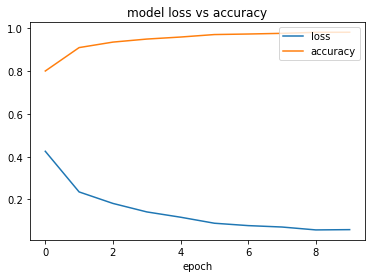

In [ ]:
# # My Classifier 
# from random import random
# from numpy import array
# from numpy import cumsum

# # create a sequence classification instance
# def get_sequence(n_timesteps):
# 	# create a sequence of random numbers in [0,1]
# 	# calculate cut-off value to change class values
#   # determine the class outcome for each item in cumulative sequence
# 	X = array([random() for _ in range(n_timesteps)])
# 	limit = n_timesteps/4.0
# 	y = array([0 if x < limit else 1 for x in cumsum(X)])
# 	return X, y

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 
from matplotlib import pyplot

n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128 

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test) 

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy']) 


pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 



In [ ]:
"""
SVM Classifier on the flattened VOXELS after PCA

Usage:

- extract_path is the where the extracted data samples are available.
- checkpoint_model_path is the path where to checkpoint the trained models during the training process


EXAMPLE: SPECIFICATION

extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/LSTM"
"""

extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS. S2039761. Mian Tashfeen Shahid Anwar. /Signal Data Pre Processing./Signal Processing Implementation/moredata/'
checkpoint_model_path="/content/RadHAR/Data/Train/ "


import glob
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pickle

# 0622620044

sub_dirs=['boxing','jack','jump','squats','walk']
# ,'jump','squats','walk']


frame_tog = [5]


#loading the train data
Data_path = extract_path+'boxing'

data = np.load(Data_path+'.npz')
train_data = data['arr_0']
train_data = np.array(train_data,dtype=np.dtype(np.int32))
train_label = data['arr_1']

del data
print(train_data.shape,train_label.shape)

Data_path = extract_path+'jack'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)


del data

print(train_data.shape,train_label.shape)


Data_path = extract_path+'jump'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
print(train_data.shape,train_label.shape)

Data_path = extract_path+'squats'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
print(train_data.shape,train_label.shape)

Data_path = extract_path+'walk'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

train_data = train_data.reshape(train_data.shape[0],train_data.shape[1], train_data.shape[2]*train_data.shape[3]*train_data.shape[4])


def number_encoding(y_data, sub_dirs, categories=5):
    Mapping=dict()

    count=1
    for i in sub_dirs:
        Mapping[i]=count
        count=count+1

    y_features2=[]
    for i in range(len(y_data)):
        Type=y_data[i]
        #print(Type)
        lab=Mapping[Type]
        y_features2.append(lab)

    y_features=np.array(y_features2)
    return y_features

labels2 = number_encoding(train_label, sub_dirs, categories=5)
train_label = labels2
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])


print('Training Data Shape is:')
print(train_data.shape,train_label.shape)


feat_train, feat_test, lbl_train, lbl_test = train_test_split(train_data, train_label, test_size=0.9, random_state=42)
del train_data, train_label

#PCA is applied with every component so the variance ratio can be graphed.
pca = PCA(n_components=14, svd_solver='randomized', whiten=True).fit(feat_train)
pca_feat_train = pca.transform(feat_train)
print(pca_feat_train.shape,lbl_train.shape)
# 6000
# 2394
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [1e3],
              # 1e3
              'gamma': [ 0.1], }

svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(pca_feat_train, lbl_train)

print('Best estimator: ')
print(svm.best_estimator_)
print(svm.best_score_)



## Saving the SVM model

# filehandler = open(checkpoint_model_path, 'wb')
# pickle.dump(svm, filehandler)


(52, 2, 10, 32, 32) (52,)
(92, 2, 10, 32, 32) (92,)
(136, 2, 10, 32, 32) (136,)
(176, 2, 10, 32, 32) (176,)
Training Data Shape is:
(232, 20480) (232,)
(23, 14) (23,)
Best estimator: 
SVC(C=1000.0, class_weight='balanced', gamma=0.1)
0.26


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
"""
Bidirectional LSTMS on VOXELS

Usage:

- extract_path is the where the extracted data samples are available.
- checkpoint_model_path is the path where to checkpoint the trained models during the training process


EXAMPLE: SPECIFICATION

extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/LSTM"
"""

# extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
# checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/LSTM"


extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS. S2039761. Mian Tashfeen Shahid Anwar. /Signal Data Pre Processing./Signal Processing Implementation/moredata/'
checkpoint_model_path="/content/RadHAR/Data/Train/ "



import glob
import os
import numpy as np
rand_seed = 1
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(rand_seed)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
from keras.layers.core import Permute, Reshape
from keras import backend as K

from keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
from sklearn.model_selection import train_test_split
from keras.models import load_model



# import glob
# import os
# import numpy as np
# # random seed.
# rand_seed = 1
# from numpy.random import seed
# seed(rand_seed)
# from tensorflow import set_random_seed
# set_random_seed(rand_seed)

# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
# from keras.layers.core import Permute, Reshape
# from keras import backend as K

# from keras import optimizers
# from keras.optimizers import SGD
# from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.callbacks import Callback
# from keras.callbacks import ModelCheckpoint
# from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
# from sklearn.model_selection import train_test_split
# from keras.models import load_model


sub_dirs=['boxing','jack','jump','squats','walk']

def one_hot_encoding(y_data, sub_dirs, categories=5):
    Mapping=dict()

    count=0
    for i in sub_dirs:
        Mapping[i]=count
        count=count+1

    y_features2=[]
    for i in range(len(y_data)):
        Type=y_data[i]
        lab=Mapping[Type]
        y_features2.append(lab)

    y_features=np.array(y_features2)
    y_features=y_features.reshape(y_features.shape[0],1)
    from tensorflow.keras.utils import to_categorical
    y_features = to_categorical(y_features)

    return y_features


def full_3D_model(summary=False):
    print('building the model ... ')
    model = Sequential()

    model.add(Bidirectional(LSTM(64, return_sequences=False, stateful=False,input_shape=(60, 10*1024) )))
    model.add(Dropout(.5,name='dropout_1'))
    model.add(Dense(128, activation='relu', name='DENSE_1'))
    model.add(Dropout(.5,name='dropout_2'))
    model.add(Dense(5, activation='softmax', name = 'output'))

    return model



frame_tog = [60]


#loading the train data
Data_path = extract_path+'boxing'

data = np.load(Data_path+'.npz')
train_data = data['arr_0']
train_data = np.array(train_data,dtype=np.dtype(np.int32))
train_label = data['arr_1']

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'jack'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)


del data

#print(train_data.shape,train_label.shape)


Data_path = extract_path+'jump'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'squats'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'walk'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

train_label = one_hot_encoding(train_label, sub_dirs, categories=5)

train_data = train_data.reshape(train_data.shape[0],train_data.shape[1], train_data.shape[2]*train_data.shape[3]*train_data.shape[4])

print('Training Data Shape is:')
print(train_data.shape,train_label.shape)



X_train, X_val, y_train, y_val  = train_test_split(train_data, train_label, test_size=0.20, random_state=1)
del train_data,train_label


model = full_3D_model()


print("Model building is completed")


adam = tensorflow.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,
                       decay=0.0, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=adam,
                  metrics=['accuracy'])

checkpoint = ModelCheckpoint(checkpoint_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Training the model
learning_hist = model.fit(X_train, y_train,
                             batch_size=20,
                             epochs=120,
                             verbose=1,
                             shuffle=True,
                           validation_data=(X_val,y_val),
                           callbacks=callbacks_list
                          )


Training Data Shape is:
(232, 2, 10240) (232, 5)
building the model ... 
Model building is completed


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
 9/10 [==========================>...] - ETA: 0s - loss: 1.6434 - accuracy: 0.2444
Epoch 1: val_loss improved from inf to 1.41813, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 22s 2s/step - loss: 1.6492 - accuracy: 0.2378 - val_loss: 1.4181 - val_accuracy: 0.4681
Epoch 2/120
 9/10 [==========================>...] - ETA: 0s - loss: 1.1875 - accuracy: 0.6222
Epoch 2: val_loss improved from 1.41813 to 1.23752, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 1.1958 - accuracy: 0.6108 - val_loss: 1.2375 - val_accuracy: 0.7021
Epoch 3/120
 9/10 [==========================>...] - ETA: 0s - loss: 1.0150 - accuracy: 0.7111
Epoch 3: val_loss improved from 1.23752 to 1.04880, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 1.0200 - accuracy: 0.7081 - val_loss: 1.0488 - val_accuracy: 0.7021
Epoch 4/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.7047 - accuracy: 0.8500
Epoch 4: val_loss improved from 1.04880 to 0.91901, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 0.6978 - accuracy: 0.8541 - val_loss: 0.9190 - val_accuracy: 0.7447
Epoch 5/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.8778
Epoch 5: val_loss improved from 0.91901 to 0.78886, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.5474 - accuracy: 0.8757 - val_loss: 0.7889 - val_accuracy: 0.7872
Epoch 6/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.4337 - accuracy: 0.9167
Epoch 6: val_loss improved from 0.78886 to 0.70462, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 0.4341 - accuracy: 0.9135 - val_loss: 0.7046 - val_accuracy: 0.7872
Epoch 7/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.2893 - accuracy: 0.9611
Epoch 7: val_loss improved from 0.70462 to 0.64979, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 0.2887 - accuracy: 0.9622 - val_loss: 0.6498 - val_accuracy: 0.7660
Epoch 8/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.2477 - accuracy: 0.9444
Epoch 8: val_loss improved from 0.64979 to 0.58444, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 0.2451 - accuracy: 0.9459 - val_loss: 0.5844 - val_accuracy: 0.7872
Epoch 9/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.1660 - accuracy: 0.9667
Epoch 9: val_loss improved from 0.58444 to 0.56889, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.1673 - accuracy: 0.9676 - val_loss: 0.5689 - val_accuracy: 0.8085
Epoch 10/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.1252 - accuracy: 0.9889
Epoch 10: val_loss improved from 0.56889 to 0.53687, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.1275 - accuracy: 0.9838 - val_loss: 0.5369 - val_accuracy: 0.8298
Epoch 11/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.1008 - accuracy: 0.9722
Epoch 11: val_loss improved from 0.53687 to 0.52594, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.0983 - accuracy: 0.9730 - val_loss: 0.5259 - val_accuracy: 0.8298
Epoch 12/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.0888 - accuracy: 0.9778
Epoch 12: val_loss improved from 0.52594 to 0.51446, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.0892 - accuracy: 0.9784 - val_loss: 0.5145 - val_accuracy: 0.8298
Epoch 13/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.0717 - accuracy: 0.9833
Epoch 13: val_loss improved from 0.51446 to 0.51020, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 17s 2s/step - loss: 0.0724 - accuracy: 0.9838 - val_loss: 0.5102 - val_accuracy: 0.8085
Epoch 14/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.0874 - accuracy: 0.9833
Epoch 14: val_loss did not improve from 0.51020
10/10 [==============================] - 0s 44ms/step - loss: 0.0851 - accuracy: 0.9838 - val_loss: 0.5233 - val_accuracy: 0.8085
Epoch 15/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.0545 - accuracy: 0.9778
Epoch 15: val_loss improved from 0.51020 to 0.49636, saving model to /content/RadHAR/Data/Train/ 


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


INFO:tensorflow:Assets written to: /content/RadHAR/Data/Train/ /assets


10/10 [==============================] - 16s 2s/step - loss: 0.0533 - accuracy: 0.9784 - val_loss: 0.4964 - val_accuracy: 0.8085
Epoch 16/120
 9/10 [==========================>...] - ETA: 0s - loss: 0.0636 - accuracy: 0.9833
Epoch 16: val_loss improved from 0.49636 to 0.47482, saving model to /content/RadHAR/Data/Train/ 


KeyboardInterrupt: ignored

In [ ]:
"""
MLP on the flattened VOXELS

Usage:

- extract_path is the where the extracted data samples are available.
- checkpoint_model_path is the path where to checkpoint the trained models during the training process


EXAMPLE: SPECIFICATION

extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/MLP"
"""

extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS. S2039761. Mian Tashfeen Shahid Anwar. /Signal Data Pre Processing./Signal Processing Implementation/Data Gen 2 /'
checkpoint_model_path="/content/RadHAR/Data/Train/ "



import glob
import os
import numpy as np
rand_seed = 1
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(rand_seed)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
from keras.layers.core import Permute, Reshape
from keras import backend as K

from keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
from sklearn.model_selection import train_test_split
from keras.models import load_model



# import glob
# import os
# import numpy as np
# # random seed.
# rand_seed = 1
# from numpy.random import seed
# seed(rand_seed)
# from tensorflow import set_random_seed
# set_random_seed(rand_seed)

# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
# from keras.layers.core import Permute, Reshape
# from keras import backend as K

# from keras import optimizers
# from keras.optimizers import SGD
# from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import *
# from keras.callbacks import Callback
# from keras.callbacks import ModelCheckpoint
# from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
# from sklearn.model_selection import train_test_split
# from keras.models import load_model


sub_dirs=['boxing','jack','jump','squats','walk']

def one_hot_encoding(y_data, sub_dirs, categories=5):
    Mapping=dict()

    count=0
    for i in sub_dirs:
        Mapping[i]=count
        count=count+1

    y_features2=[]
    for i in range(len(y_data)):
        Type=y_data[i]
        lab=Mapping[Type]
        y_features2.append(lab)

    y_features=np.array(y_features2)
    y_features=y_features.reshape(y_features.shape[0],1)
    from tensorflow.keras.utils import to_categorical
    y_features = to_categorical(y_features)

    return y_features



def full_3D_model(summary=False):
    print('building the model ... ')
    model = Sequential()

    model.add(Dense(64, activation='relu', input_dim=614400))
    model.add(Dropout(.5,name='dropout_1'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5,name='dropout_2'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5,name='dropout_3'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.5,name='dropout_4'))
    model.add(Dense(5, activation='softmax', name = 'output'))

    return model




frame_tog = [5]


#loading the train data
Data_path = extract_path+'boxing'

data = np.load(Data_path+'.npz')
train_data = data['arr_0']
train_data = np.array(train_data,dtype=np.dtype(np.int32))
train_label = data['arr_1']

del data

Data_path = extract_path+'jack'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)


del data



Data_path = extract_path+'jump'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

Data_path = extract_path+'squats'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

Data_path = extract_path+'walk'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

train_label = one_hot_encoding(train_label, sub_dirs, categories=5)

train_data = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2]*train_data.shape[3]*train_data.shape[4])

print('Training Data Shape is:')
print(train_data.shape,train_label.shape)

X_train, X_val, y_train, y_val  = train_test_split(train_data, train_label, test_size=0.20, random_state=1)
del train_data,train_label


model = full_3D_model()

print("Model building is completed")


adam = tensorflow.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,
                       decay=0.0, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=adam,
                  metrics=['accuracy'])

checkpoint = ModelCheckpoint(checkpoint_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Training the model
learning_hist = model.fit(X_train, y_train,
                             batch_size=20,
                             epochs=30,
                             verbose=1,
                             shuffle=True,
                           validation_data=(X_val,y_val),
                           callbacks=callbacks_list
                          )


Training Data Shape is:
(1102, 20480) (1102, 5)
building the model ... 
Model building is completed
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
"""
Time-Distributed CNN + Bidirectional LSTMS on VOXELS

- extract_path is the where the extracted data samples are available.
- checkpoint_model_path is the path where to checkpoint the trained models during the training process


EXAMPLE: SPECIFICATION

extract_path = '/Users/sandeep/Research/Ti-mmWave/data/extract/Train_Data_voxels_'
checkpoint_model_path="/Users/sandeep/Research/Ti-mmWave/data/extract/TD_CNN_LSTM"

"""


extract_path = '/content/drive/MyDrive/RESEARCH PROJECT DOCUMENTS. S2039761. Mian Tashfeen Shahid Anwar. /Signal Data Pre Processing./Signal Processing Implementation/Data Gen 2 /'
checkpoint_model_path="/content/RadHAR/Classifiers/checkpoint"


import glob
import os
import numpy as np
rand_seed = 1
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(rand_seed)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Activation
from keras.layers.core import Permute, Reshape
from keras import backend as K

from keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Bidirectional,TimeDistributed
from sklearn.model_selection import train_test_split
from keras.models import load_model




sub_dirs=['boxing','jack','jump','squats','walk']

def one_hot_encoding(y_data, sub_dirs, categories=5):
    Mapping=dict()

    count=0
    for i in sub_dirs:
        Mapping[i]=count
        count=count+1

    y_features2=[]
    for i in range(len(y_data)):
        Type=y_data[i]
        lab=Mapping[Type]
        y_features2.append(lab)

    y_features=np.array(y_features2)
    y_features=y_features.reshape(y_features.shape[0],1)
    from tensorflow.keras.utils import to_categorical
    y_features = to_categorical(y_features)

    return y_features


def full_3D_model(input_x, input_y, reg = 0, num_feat_map = 16, summary=False):
    print('building the model ... ')
    model = Sequential()
    # 1st layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv1a", input_shape=(10, 32, 32,1), padding="same", activation="relu")))
    # 2nd layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv1b", padding="same", activation="relu")))

    model.add(TimeDistributed(MaxPooling3D(name="pool1", strides=(2, 2, 2), pool_size=(2, 2, 2), padding="valid")))

    # 3rd layer group
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2a", padding="same", activation="relu")))
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2b", padding="same", activation="relu")))
    model.add(TimeDistributed(MaxPooling3D(strides=(2, 2, 2), pool_size=(2, 2, 2), data_format="channels_first", name="pool2", padding="valid")))

    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2a", padding="same", activation="relu")))
    model.add(TimeDistributed(Conv3D(32, (3, 3, 3), strides=(1, 1, 1), name="conv2b", padding="same", activation="relu")))
    model.add(TimeDistributed(MaxPooling3D(strides=(2, 2, 2), pool_size=(2, 2, 2), data_format="channels_first", name="pool2", padding="valid")))


    model.add(TimeDistributed(Flatten()))
    model.add(Dropout(0.5))

    model.add(Bidirectional(LSTM(16, return_sequences=False, stateful=False)))

    model.add(Dropout(.3))

    model.add(Dense(input_y.shape[1], activation='softmax', name = 'output'))

    return model



frame_tog = [60]


#loading the train data
Data_path = extract_path+'boxing'

data = np.load(Data_path+'.npz')
train_data = data['arr_0']
train_data = np.array(train_data,dtype=np.dtype(np.int32))
train_label = data['arr_1']

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'jack'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)


del data

#print(train_data.shape,train_label.shape)


Data_path = extract_path+'jump'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'squats'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data
#print(train_data.shape,train_label.shape)

Data_path = extract_path+'walk'
data = np.load(Data_path+'.npz')
train_data = np.concatenate((train_data, data['arr_0']), axis=0)
train_label = np.concatenate((train_label, data['arr_1']), axis=0)

del data

train_label = one_hot_encoding(train_label, sub_dirs, categories=5)
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1], train_data.shape[2],train_data.shape[3],train_data.shape[4],1)

print('Training Data Shape is:')
print(train_data.shape,train_label.shape)



X_train, X_val, y_train, y_val  = train_test_split(train_data, train_label, test_size=0.20, random_state=1)
del train_data,train_label


model = full_3D_model(X_train,y_train)

print("Model building is completed")


adam = tensorflow.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,
                       decay=0.0, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=adam,
                  metrics=['accuracy'])

checkpoint = ModelCheckpoint(checkpoint_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Training the model
learning_hist = model.fit(X_train, y_train,
                             batch_size=3,
                             epochs=35,
                             verbose=1,
                             shuffle=True,
                           validation_data=(X_val,y_val),
                           callbacks=callbacks_list
                          )


Training Data Shape is:
(812, 2, 10, 32, 32, 1) (812, 5)
building the model ... 
Model building is completed
Epoch 1/35


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


217/217 [==============================] - ETA: 0s - loss: 1.4808 - accuracy: 0.3159
Epoch 1: val_loss improved from inf to 1.45888, saving model to /content/RadHAR/Classifiers/checkpoint


INFO:tensorflow:Assets written to: /content/RadHAR/Classifiers/checkpoint/assets


INFO:tensorflow:Assets written to: /content/RadHAR/Classifiers/checkpoint/assets


217/217 [==============================] - 151s 672ms/step - loss: 1.4808 - accuracy: 0.3159 - val_loss: 1.4589 - val_accuracy: 0.3742
Epoch 2/35
217/217 [==============================] - ETA: 0s - loss: 1.4963 - accuracy: 0.3128
Epoch 2: val_loss did not improve from 1.45888
217/217 [==============================] - 127s 583ms/step - loss: 1.4963 - accuracy: 0.3128 - val_loss: 1.5431 - val_accuracy: 0.3252
Epoch 3/35
217/217 [==============================] - ETA: 0s - loss: 1.4885 - accuracy: 0.3267
Epoch 3: val_loss did not improve from 1.45888
217/217 [==============================] - 126s 581ms/step - loss: 1.4885 - accuracy: 0.3267 - val_loss: 1.4923 - val_accuracy: 0.3620
Epoch 4/35
217/217 [==============================] - ETA: 0s - loss: 1.5228 - accuracy: 0.2989
Epoch 4: val_loss did not improve from 1.45888
217/217 [==============================] - 126s 581ms/step - loss: 1.5228 - accuracy: 0.2989 - val_loss: 1.4734 - val_accuracy: 0.3681
Epoch 5/35
217/217 [===========

KeyboardInterrupt: ignored